In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

First, let's see what the radius and momentum distribution looks like without thinking about sin(theta)


In [2]:
#Radius of the sphere
r = 5 #cm

# Generate random angles theta and phi
theta_values = np.array([])
while len(theta_values) < 5000:
    theta1 = np.random.uniform(0, math.pi)
    test1 = -2 # not the random number (0,1) but just 1, so any value is ok, but we keep the same code
    if np.sin(theta1) > test1:
        theta_values = np.append(theta_values, theta1)

phi_values = np.random.uniform(0, 2*math.pi, size=5000)

# Calculate corresponding areas
dA_values = r**2 * np.sin(theta_values) * theta_values * phi_values

#direction of momentum elements 
kx=np.cos(phi_values) *np.sin(theta_values);
ky=np.sin(phi_values)*np.sin(theta_values);
kz=np.cos(theta_values);


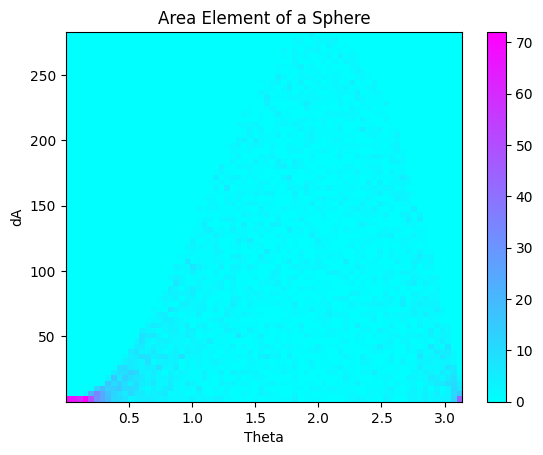

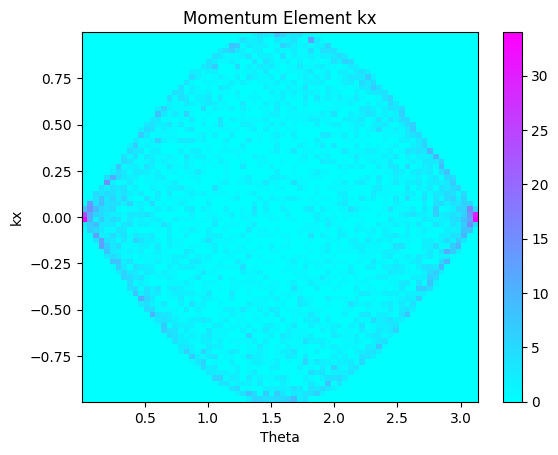

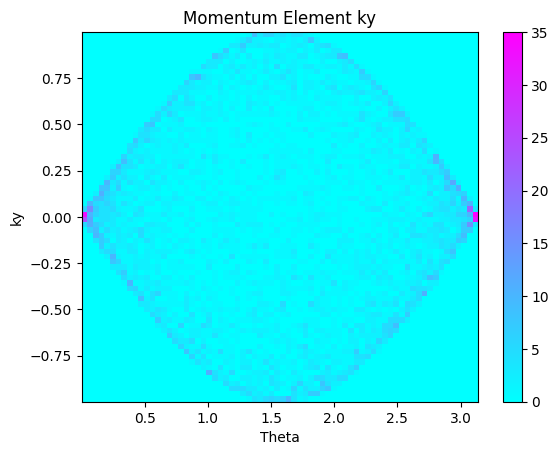

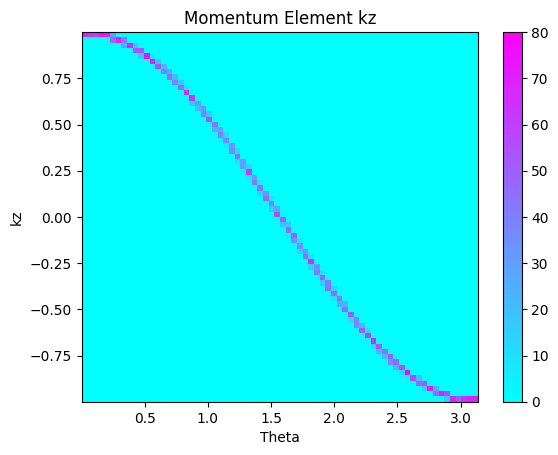

In [3]:
# Plot dA as a heatmap
plt.hist2d(theta_values, dA_values, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('dA')
plt.title('Area Element of a Sphere')
plt.show()

plt.hist2d(theta_values, kx, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('kx')
plt.title('Momentum Element kx')
plt.show()

plt.hist2d(theta_values, ky, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('ky')
plt.title('Momentum Element ky')
plt.show()

plt.hist2d(theta_values, kz, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('kz')
plt.title('Momentum Element kz')
plt.show()


Next, let's make sure that sin(theta) passes the test

In [4]:
theta_values2 = np.array([])
while len(theta_values2) < 5000:
    theta = np.random.uniform(0, math.pi)
    test = np.random.uniform(0, 1)
    if np.sin(theta) > test:
        theta_values2 = np.append(theta_values2, theta)
        
print(len(theta_values2))

phi_values2 = np.random.uniform(0, 2*math.pi, size=5000)
print(len(phi_values2))




5000
5000


In [5]:
# Calculate corresponding areas
dA_values2 = r**2 * np.sin(theta_values2) * theta_values2 * phi_values2

#momentum elements 
kx=np.cos(phi_values2) *np.sin(theta_values2)
ky=np.sin(phi_values2)*np.sin(theta_values2)
kz=np.cos(theta_values2)

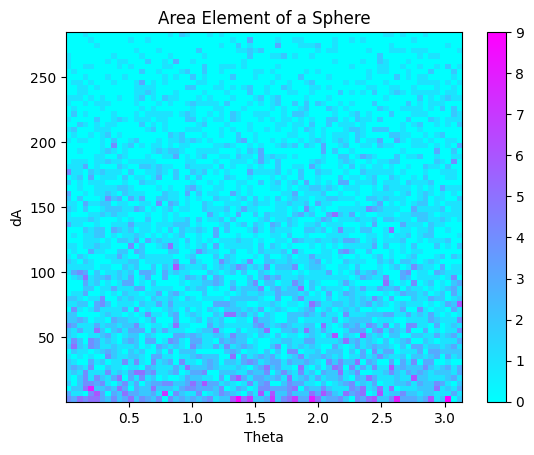

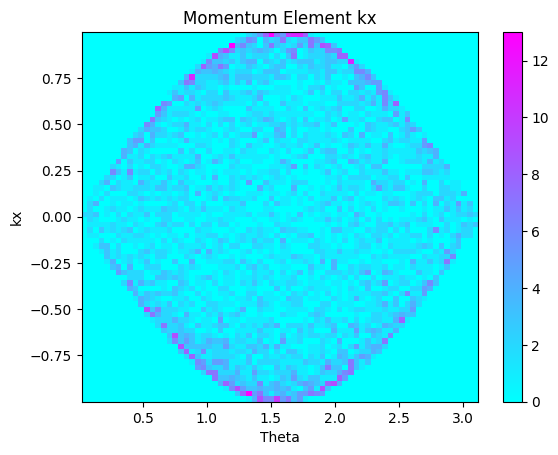

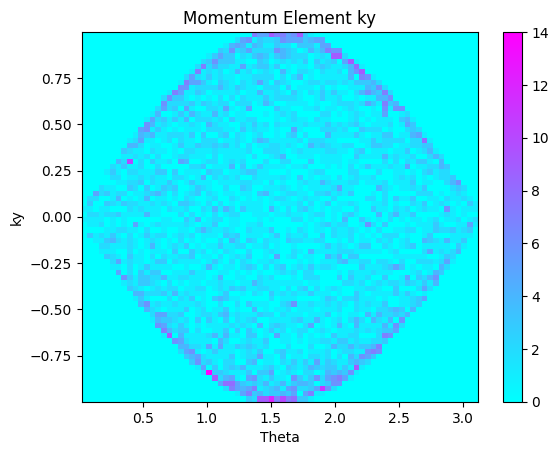

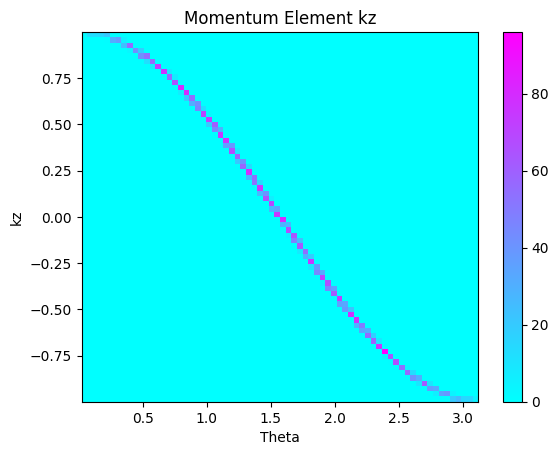

In [6]:
# Plot dA in terms of theta
plt.hist2d(theta_values, dA_values2, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('dA')
plt.title('Area Element of a Sphere')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(theta_values2, kx, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('kx')
plt.title('Momentum Element kx')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(theta_values2, ky, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('ky')
plt.title('Momentum Element ky')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(theta_values2, kz, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('kz')
plt.title('Momentum Element kz')
plt.show()

The code on AmBe_GeSim_efficiency/src/gesimPrimaryGeneratorAction.cc defines the momentum as 

    auto beta = CLHEP::twopi*G4UniformRand(); 
    float dirZ = -1.0 + 2*G4UniformRand();
    auto dirR = sqrt(1.-dirZ*dirZ);
    auto dirX = dirR*std::cos(beta);
    auto dirY = dirR*std::sin(beta); 

Which is in cylindrical coordinates, not spherical, so the area element should not depend on the sin(theta). Let's make the test anyway and find out: 

In [7]:

# Generate random angles theta and phi
beta_values = np.array([])
while len(beta_values) < 5000:
    beta = np.random.uniform(0, 2*math.pi)
    test3 = -2 # not the random number (0,1) but just -2 because EVERY sine is bigger than -2
    if np.sin(beta) > test3:
        beta_values = np.append(beta_values, beta)



kz = np.array([])
while len(kz) < 5000:
    kz = np.append(kz, -1.0 + 2 * np.random.uniform(0, 1))

r_values = np.sqrt(1 - kz*kz)

kx = r_values * np.cos(beta_values)
ky = r_values * np.sin(beta_values)

# Calculate corresponding areas
dA_values = r * beta_values * kz


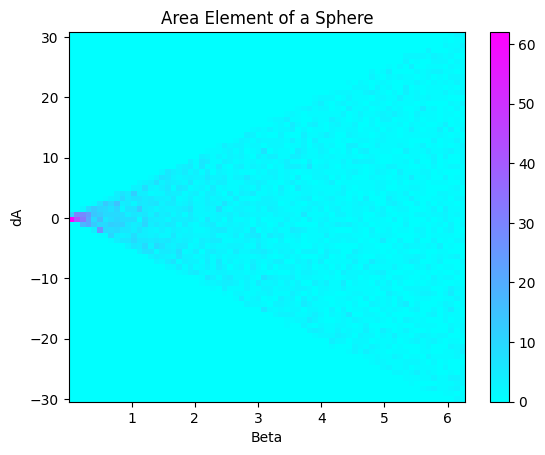

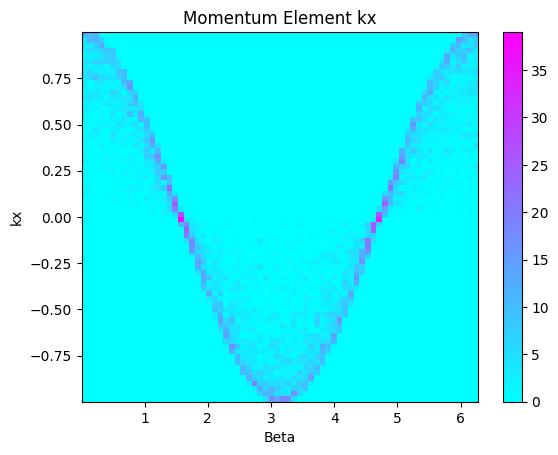

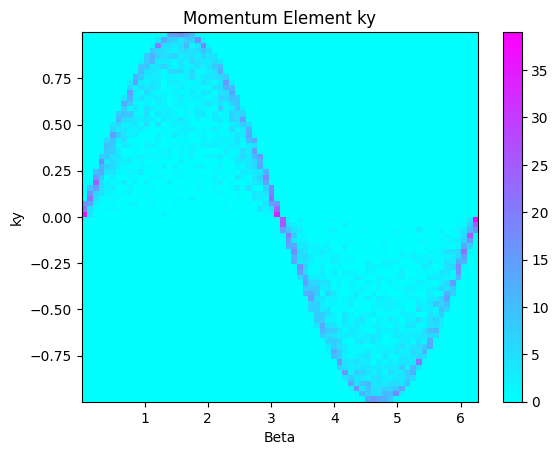

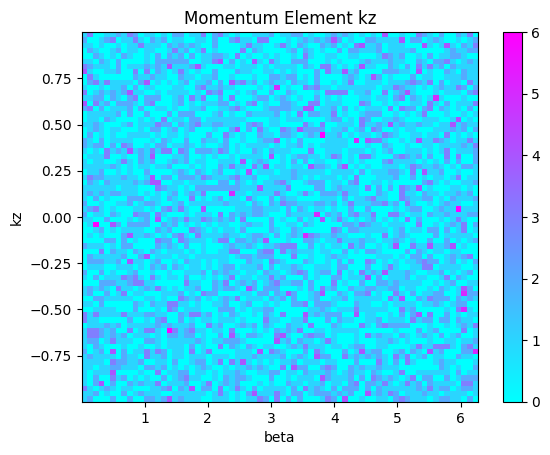

In [8]:
# Plot dA in terms of theta
plt.hist2d(beta_values, dA_values, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('dA')
plt.title('Area Element of a Sphere')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(beta_values, kx, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('kx')
plt.title('Momentum Element kx')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(beta_values, ky, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('ky')
plt.title('Momentum Element ky')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(beta_values, kz, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('beta')
plt.ylabel('kz')
plt.title('Momentum Element kz')
plt.show()

In [12]:
# Generate random angles theta and phi
beta_values = np.array([])
while len(beta_values) < 5000:
    beta = np.random.uniform(0, 2*math.pi)
    test3 = np.random.uniform(-1, 1) 
    if np.sin(beta) > test3:
        beta_values = np.append(beta_values, beta)



kz = np.array([])
while len(kz) < 5000:
    kz = np.append(kz, -1.0 + 2 * np.random.uniform(0, 1))

r_values = np.sqrt(1 - kz*kz)

kx = r_values * np.cos(beta_values)
ky = r_values * np.sin(beta_values)

# Calculate corresponding areas
dA_values = r * beta_values * kz


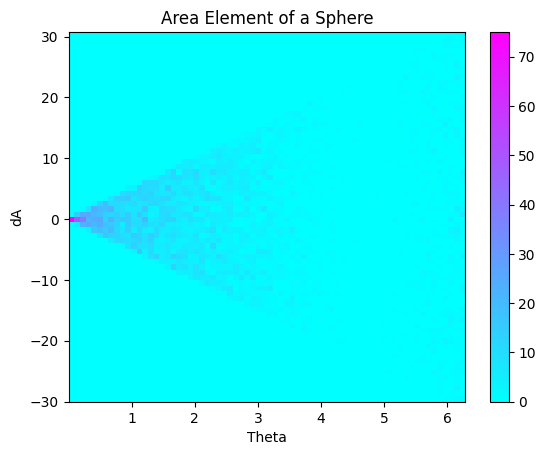

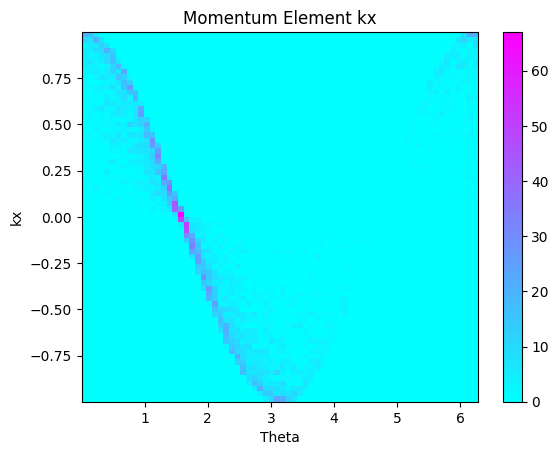

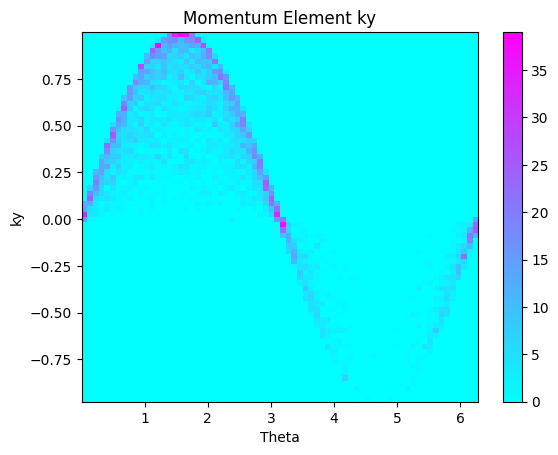

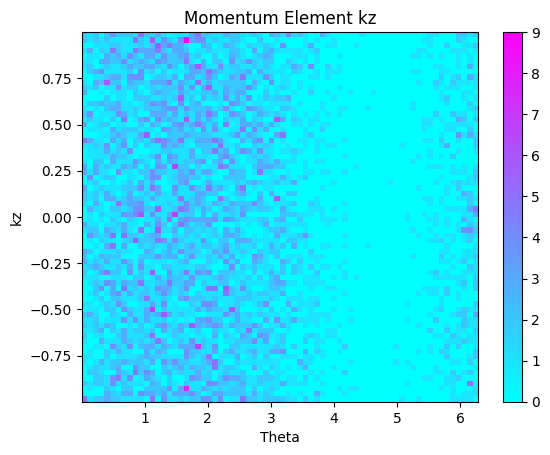

In [13]:
# Plot dA in terms of theta
plt.hist2d(beta_values, dA_values, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('dA')
plt.title('Area Element of a Sphere')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(beta_values, kx, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('kx')
plt.title('Momentum Element kx')
plt.show()

# Plot momentum elements in terms of theta 
plt.hist2d(beta_values, ky, bins=70, cmap='cool')
plt.colorbar()
plt.xlabel('Theta')
plt.ylabel('ky')
plt.title('Momentum Element ky')
plt.show()

# Plot momentum elements in terms of theta
plt.hist2d(beta_values, kz, bins=70, cmap='cool')
plt.colorbar() 
plt.xlabel('Theta')
plt.ylabel('kz')
plt.title('Momentum Element kz')
plt.show()

We do not need to make the sin test to ensure the distribution is isotropic in cylindrical cordinates! 